In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  glob
import seaborn as sns

tocategory = lambda col: pd.Categorical(col)
underscoretospace = lambda x: x.replace("_", " ") if type(x) is str else x
def q5(x): return x.quantile(.05)
def q95(x): return x.quantile(.95)

In [2]:
filenames = glob.glob("data/lsb.*.r*")
params = ["Algorithm", "Max threads", "Graph nodes"];

In [3]:
def get_df(filename):
    return (pd
      .read_csv(filename, sep=" ", comment="#", skipinitialspace=True, index_col="id")
      .applymap(underscoretospace)
      .dropna("columns", "all")
    )
df = pd.concat(get_df(filename) for filename in filenames)
df[["Algorithm", "Graph_name"]] = df[["Algorithm", "Graph_name"]].apply(tocategory)
df.columns = df.columns.map(underscoretospace)

In [4]:
df.head(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead
id,,,,,,,
0,parallel sollin AL,264346,USA-road-d.,1,0,4.244756e+06,0
1,parallel sollin AL,264346,USA-road-d.,1,1,4.572053e+06,0
2,parallel sollin AL,264346,USA-road-d.,1,2,4.492502e+06,0
3,parallel sollin AL,264346,USA-road-d.,1,3,4.581483e+06,2
4,parallel sollin AL,264346,USA-road-d.,1,4,4.502511e+06,0


In [5]:
df.tail(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead
id,,,,,,,
295,parallel sollin EL,264346,USA-road-d.,32,45,5.122853e+06,0
296,parallel sollin EL,264346,USA-road-d.,32,46,5.379886e+06,0
297,parallel sollin EL,264346,USA-road-d.,32,47,5.272868e+06,0
298,parallel sollin EL,264346,USA-road-d.,32,48,5.227295e+06,0
299,parallel sollin EL,264346,USA-road-d.,32,49,5.206183e+06,0


In [6]:
timequantiles = df.groupby(params).agg([q5, q95])["time"]
df_timequantiles =  timequantiles.loc[map(tuple, df[params].values)]

In [7]:
summary = (df[params + ["time"]]
    [(df.time >= df_timequantiles["q5"].values) & (df.time <= df_timequantiles["q95"].values)]
    .groupby(params).agg(["median", "mean", "min", "max", "std"])
)

In [8]:
summary

time                \
                                                  median          mean   
Algorithm          Max threads Graph nodes                               
Filter Kruskal     1           100          2.974816e+02  3.064262e+02   
                               1000         3.414927e+03  3.439977e+03   
                               10000        4.477271e+04  4.714912e+04   
                               264346       1.620561e+06  1.646405e+06   
                   2           100          2.980435e+02  3.076526e+02   
                               1000         3.371364e+03  3.371807e+03   
                               10000        4.800830e+04  4.788633e+04   
                               264346       1.730840e+06  1.732349e+06   
                   4           100          3.287606e+02  3.315836e+02   
                               1000         3.364648e+03  3.345155e+03   
                               10000        4.514464e+04  4.562095e+04   
                               264346       1.629568e+06  1.623982e+06   
                   8           100          3.160430e+02  3.146611e+02   
                               1000         3.373216e+03  3.356331e+03   
                               10000        4.328972e+04  4.435610e+04   
                               264346       1.556109e+06  1.571769e+06   
                   16          100          3.242308e+02  3.229322e+02   
                               1000         3.404616e+03  3.449620e+03   
                               10000        4.374762e+04  4.363501e+04   
                               264346       1.570750e+06  1.578522e+06   
                   32          100          3.087827e+02  3.141924e+02   
                               1000         3.348785e+03  3.324825e+03   
                               10000        4.424766e+04  4.541458e+04   
                               264346       1.702759e+06  1.689956e+06   
Sequential Kruskal 1           100          2.613741e+02  2.619217e+02   
                               1000         3.339826e+03  3.344868e+03   
                               10000        5.039866e+04  5.053817e+04   
                               264346       7.482825e+05  7.571819e+05   
Sollin             1           100          3.054276e+03  3.068988e+03   
                               1000         5.389904e+04  5.393917e+04   
...                                                  ...           ...   
parallel sollin AL 16          10000        5.836669e+05  5.839130e+05   
                               264346       4.029954e+06  4.034788e+06   
                   32          100          7.851077e+03  7.949392e+03   
                               1000         6.565983e+04  6.628926e+04   
                               10000        7.351793e+05  7.371123e+05   
                               264346       4.947540e+06  4.962258e+06   
parallel sollin EL 1           100          6.175020e+03  6.196331e+03   
                               1000         4.896931e+04  4.906804e+04   
                               10000        4.547816e+05  4.547715e+05   
                               264346       1.592362e+06  1.601383e+06   
                   2           100          6.995206e+03  7.021409e+03   
                               1000         6.202609e+04  6.242974e+04   
                               10000        4.848150e+05  5.145055e+05   
                               264346       1.820061e+06  1.835226e+06   
                   4           100          7.233781e+03  7.245132e+03   
                               1000         6.810903e+04  7.118585e+04   
                               10000        6.423193e+05  6.439399e+05   
                               264346       2.249238e+06  2.223330e+06   
                   8           100          8.830365e+03  8.730287e+03   
                               1000         8.719854e+04  8.722248e+04   
                               10000        8.095430e+05

In [9]:
g_idx = ["Graph nodes", "Graph name"]
graphs = df[g_idx].drop_duplicates().values

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


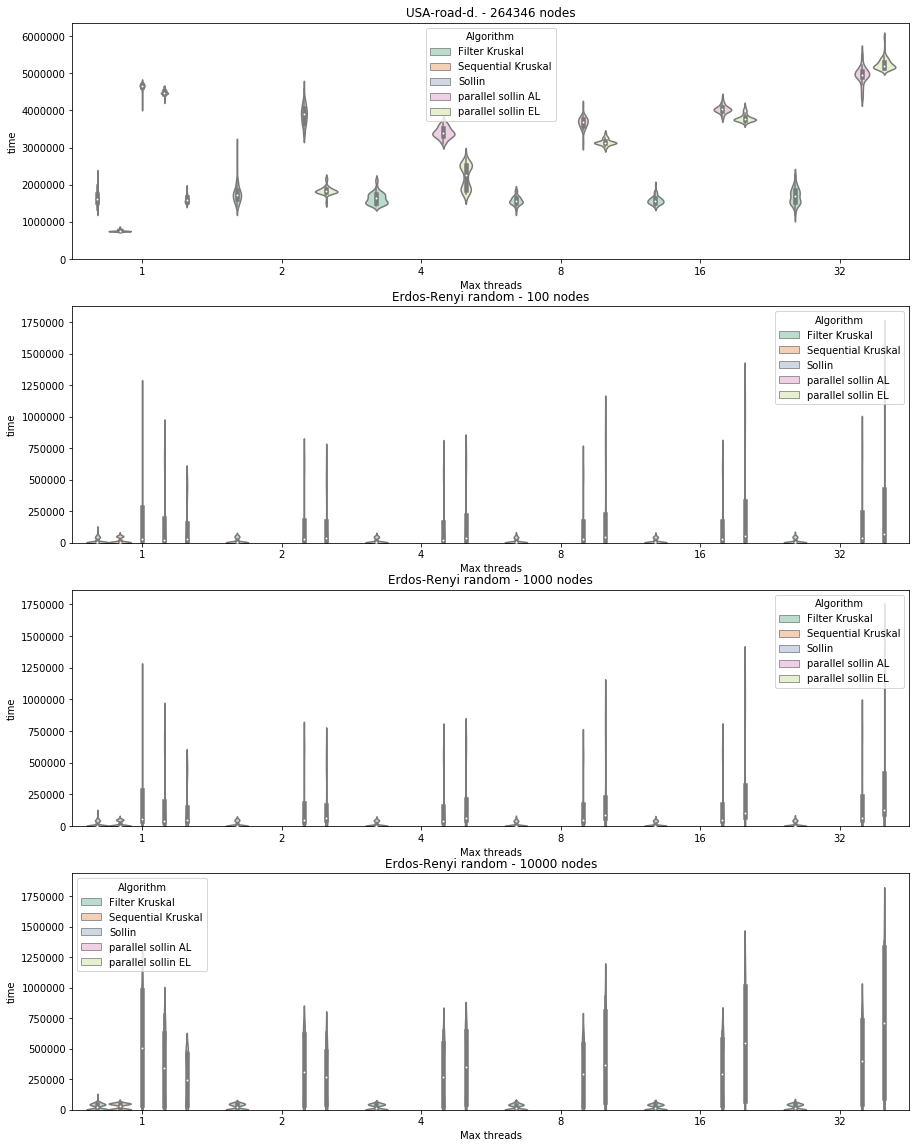

In [10]:
fig, ax = plt.subplots(nrows=len(graphs),figsize=(15,5*len(graphs)))
for i, e in enumerate(graphs):
    sns.violinplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df[g_idx].values == e], 
        palette="Pastel2", ax=ax[i]
    )
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")
    ax[i].set_ylim(0,)

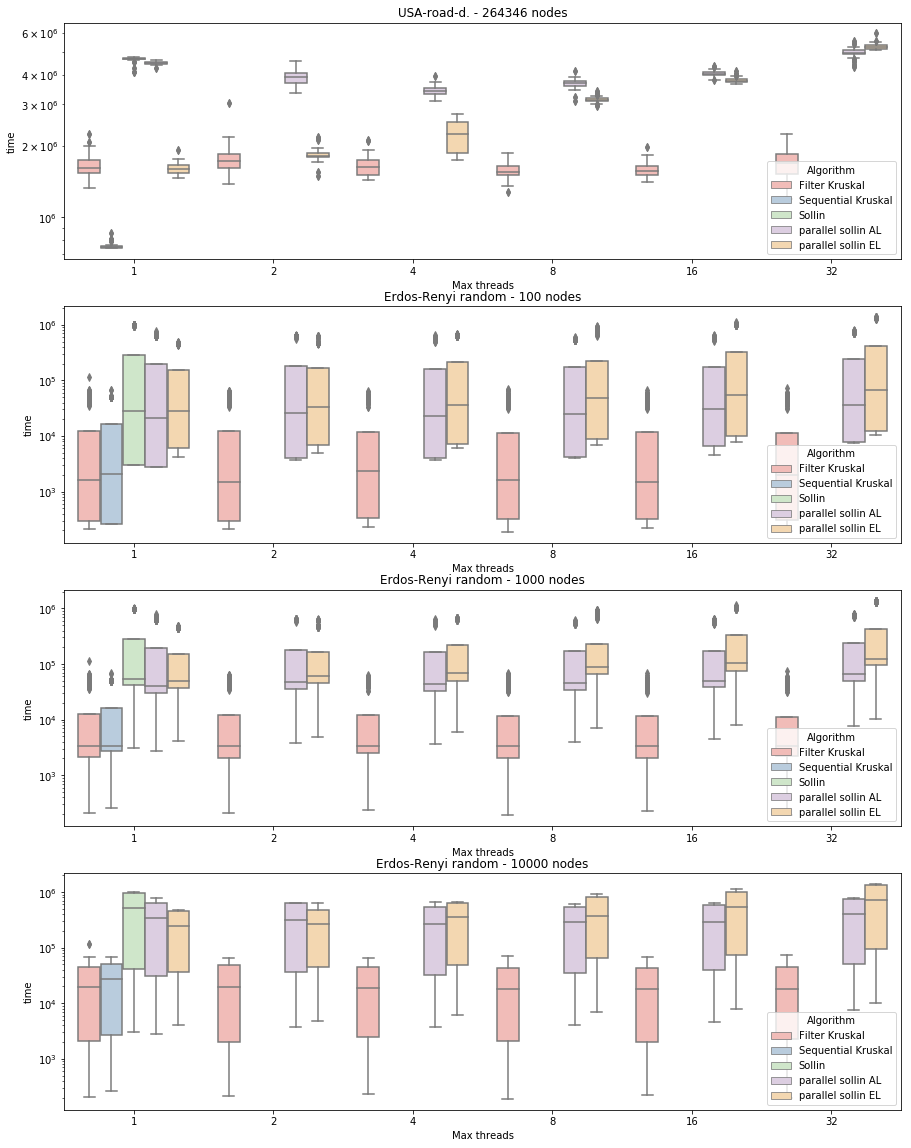

In [11]:
fig, ax = plt.subplots(nrows=len(graphs),figsize=(15,5*len(graphs)))
for i, e in enumerate(graphs):
    sns.boxplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df[g_idx].values == e], 
        palette="Pastel1", ax=ax[i]
    ).set(yscale="log")
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")